In [297]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [298]:
data = pd.read_excel('data/BakeryData_Vilnius.xlsx')
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data

,date,weekday,main street A,main street B,station A,station B
0,2016-05-11,3,2.23,NaN,NaN,NaN
1,2016-05-12,4,18.10,NaN,NaN,NaN
2,2016-05-13,5,15.85,NaN,NaN,NaN
3,2016-05-14,6,14.22,NaN,NaN,NaN
4,2016-05-15,7,2.58,NaN,NaN,NaN
...,...,...,...,...,...,...
2572,2023-05-27,6,168.05,32.34,76.97,114.30
2573,2023-05-28,7,44.62,32.85,80.21,91.25
2574,2023-05-29,1,64.11,116.84,149.75,92.56
2575,2023-05-30,2,103.63,134.48,194.03,75.63


In [299]:
def describe_store(store_data, name):
    print("Store: ", name)
    print("Mean: ", np.mean(store_data['values']))
    print("Sample variance: ", np.var(store_data['values']))
    print("Number of observations: ", len(store_data))
    print("-----")

In [300]:
streetAData = data[['date', 'weekday', 'main street A']].rename(columns={'main street A': 'values'}).dropna()
streetBData = data[['date', 'weekday', 'main street B']].rename(columns={'main street B': 'values'}).dropna()
stationAData = data[['date', 'weekday', 'station A']].rename(columns={'station A': 'values'}).dropna()
stationBData = data[['date', 'weekday', 'station B']].rename(columns={'station B': 'values'}).dropna()

In [301]:
describe_store(streetAData, "Main street A")
describe_store(streetBData, "Main street B")
describe_store(stationAData, "Station A")
describe_store(stationBData, "Station B")

Store:  Main street A
Mean:  66.52748544819558
Sample variance:  1784.8520804445882
Number of observations:  2577
-----
Store:  Main street B
Mean:  99.36762295081967
Sample variance:  1880.8398951693093
Number of observations:  122
-----
Store:  Station A
Mean:  114.41242840778922
Sample variance:  2834.4730474819853
Number of observations:  1746
-----
Store:  Station B
Mean:  118.43760606060604
Sample variance:  2025.8235357842054
Number of observations:  330
-----


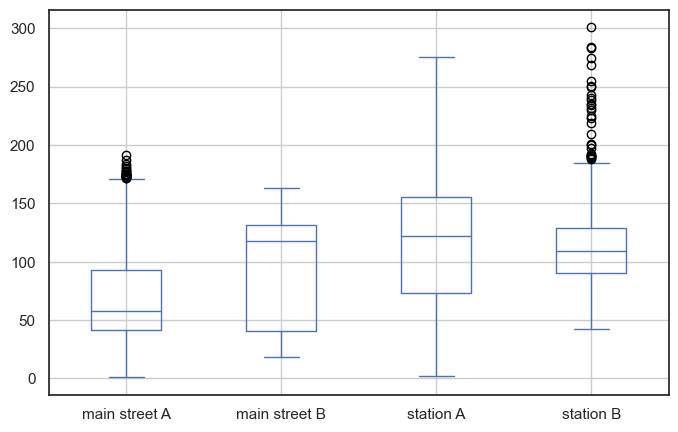

In [302]:
bp = data.boxplot(column=['main street A', 'main street B', 'station A', 'station B'], color='b')

array([<Axes: title={'center': 'station B'}>], dtype=object)

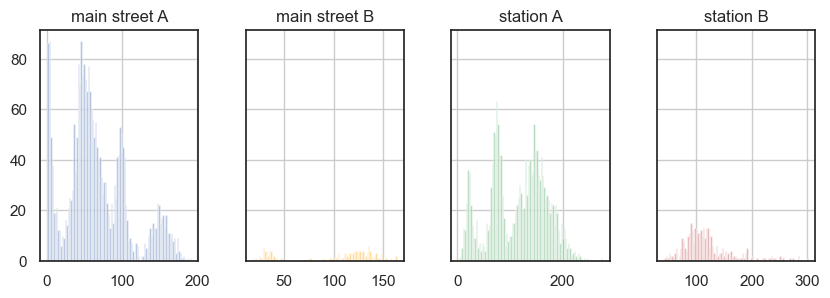

In [303]:
kwargs = dict(alpha=0.5, bins=100)
fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharey=True, dpi=100)
data.hist('main street A', **kwargs, ax=axes[0], color='b')
data.hist('main street B', **kwargs, ax=axes[1], color='orange')
data.hist('station A', **kwargs, ax=axes[2], color='g')
data.hist('station B', **kwargs, ax=axes[3], color='r')

Text(0, 0.5, 'Daily average demand')

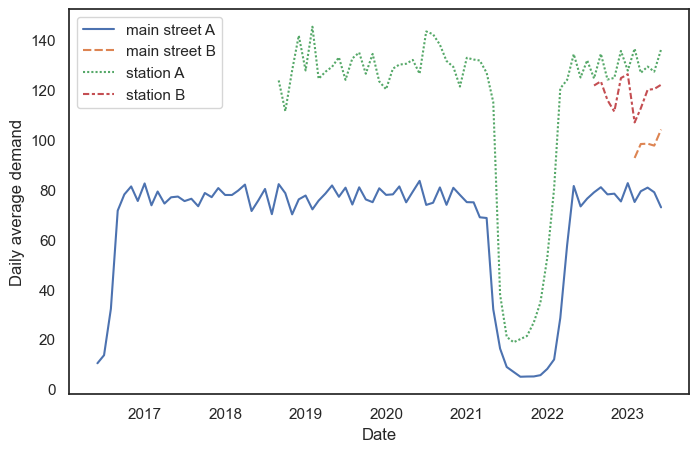

In [304]:
monthly = data.groupby(pd.Grouper(key='date', freq='M')).mean()
sns.set(rc={'figure.figsize': (8, 5)})
sns.set_theme(style='white')
sns.lineplot(data=monthly[['main street A', 'main street B', 'station A', 'station B']])
plt.xlabel('Date')
plt.ylabel('Daily average demand')